# PHASE 3 PROJECT
## Business Understanding
In the highly competitive telecom industry, customer retention is crucial for sustained business growth. A significant challenge faced by telecom providers is customer churn, where users discontinue their services. Understanding the factors influencing churn can help companies take proactive measures to enhance customer satisfaction and reduce revenue loss.

This dataset contains various attributes related to customer usage patterns, service plans, and interactions with customer support. By analyzing this data, we aim to build a predictive model that can identify customers at high risk of churning.

## Business Objectives

1.  Predict churn probability: Develop a model to classify customers as likely to churn or likely to stay based on their usage behavior.

2. Identify key churn indicators: Determine which factors (e.g., high call charges, frequent customer service calls, etc.) contribute the most to churn.

## Data Cleaning

In [4]:
#Loading the data

import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import pandas as pd

warnings.filterwarnings('ignore')

df = pd.read_csv('telecoms.csv')
df.head()

,state,account length,area code,phone number,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total day charge,...,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls,churn
0,KS,128,415,382-4657,no,yes,25,265.1,110,45.07,...,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,OH,107,415,371-7191,no,yes,26,161.6,123,27.47,...,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,NJ,137,415,358-1921,no,no,0,243.4,114,41.38,...,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,OH,84,408,375-9999,yes,no,0,299.4,71,50.90,...,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,OK,75,415,330-6626,yes,no,0,166.7,113,28.34,...,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 21 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   state                   3333 non-null   object 
 1   account length          3333 non-null   int64  
 2   area code               3333 non-null   int64  
 3   phone number            3333 non-null   object 
 4   international plan      3333 non-null   object 
 5   voice mail plan         3333 non-null   object 
 6   number vmail messages   3333 non-null   int64  
 7   total day minutes       3333 non-null   float64
 8   total day calls         3333 non-null   int64  
 9   total day charge        3333 non-null   float64
 10  total eve minutes       3333 non-null   float64
 11  total eve calls         3333 non-null   int64  
 12  total eve charge        3333 non-null   float64
 13  total night minutes     3333 non-null   float64
 14  total night calls       3333 non-null   

In [6]:
df.describe()

,account length,area code,number vmail messages,total day minutes,total day calls,total day charge,total eve minutes,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls
count,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000
mean,101.064806,437.182418,8.099010,179.775098,100.435644,30.562307,200.980348,100.114311,17.083540,200.872037,100.107711,9.039325,10.237294,4.479448,2.764581,1.562856
std,39.822106,42.371290,13.688365,54.467389,20.069084,9.259435,50.713844,19.922625,4.310668,50.573847,19.568609,2.275873,2.791840,2.461214,0.753773,1.315491
min,1.000000,408.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,23.200000,33.000000,1.040000,0.000000,0.000000,0.000000,0.000000
25%,74.000000,408.000000,0.000000,143.700000,87.000000,24.430000,166.600000,87.000000,14.160000,167.000000,87.000000,7.520000,8.500000,3.000000,2.300000,1.000000
50%,101.000000,415.000000,0.000000,179.400000,101.000000,30.500000,201.400000,100.000000,17.120000,201.200000,100.000000,9.050000,10.300000,4.000000,2.780000,1.000000
75%,127.000000,510.000000,20.000000,216.400000,114.000000,36.790000,235.300000,114.000000,20.000000,235.300000,113.000000,10.590000,12.100000,6.000000,3.270000,2.000000
max,243.000000,510.000000,51.000000,350.800000,165.000000,59.640000,363.700000,170.000000,30.910000,395.000000,175.000000,17.770000,20.000000,20.000000,5.400000,9.000000


In [7]:
df.isnull().sum()

state                     0
account length            0
area code                 0
phone number              0
international plan        0
voice mail plan           0
number vmail messages     0
total day minutes         0
total day calls           0
total day charge          0
total eve minutes         0
total eve calls           0
total eve charge          0
total night minutes       0
total night calls         0
total night charge        0
total intl minutes        0
total intl calls          0
total intl charge         0
customer service calls    0
churn                     0
dtype: int64

In [8]:
df.duplicated().sum()

0

The dataset seems to have no null or duplicated values, I will proceed to look at the visualizations and outliers

#### Removing outliers

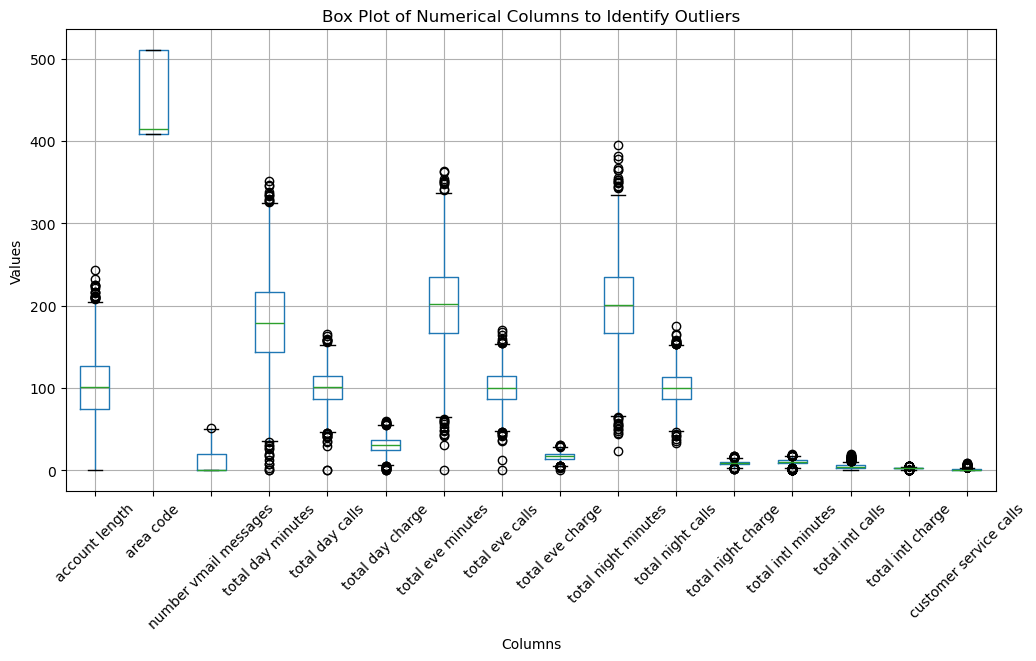

In [10]:

numerical_cols = df.select_dtypes(include=['number'])

# Plot box plots for each numerical column
plt.figure(figsize=(12, 6))
numerical_cols.boxplot(rot=45)
plt.title("Box Plot of Numerical Columns to Identify Outliers")
plt.ylabel("Values")
plt.xlabel("Columns")
plt.show()


In [15]:
#Defining columns with outliers
columns_with_outliers = [
    'account length',
    'number vmail messages',
    'total day minutes',
    'total day calls',
    'total day charge',
    'total eve minutes',
    'total eve calls',
    'total eve charge',
    'total night minutes',
    'total night calls',
    'total night charge',
    'total intl minutes',
    'total intl calls',
    'total intl charge',
    'customer service calls'
]
#removing outliers


df_cleaned = df.copy()  

for col in columns_with_outliers:
    Q1 = df_cleaned[col].quantile(0.25)
    Q3 = df_cleaned[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    df_cleaned = df_cleaned[(df_cleaned[col] >= lower_bound) & (df_cleaned[col] <= upper_bound)]

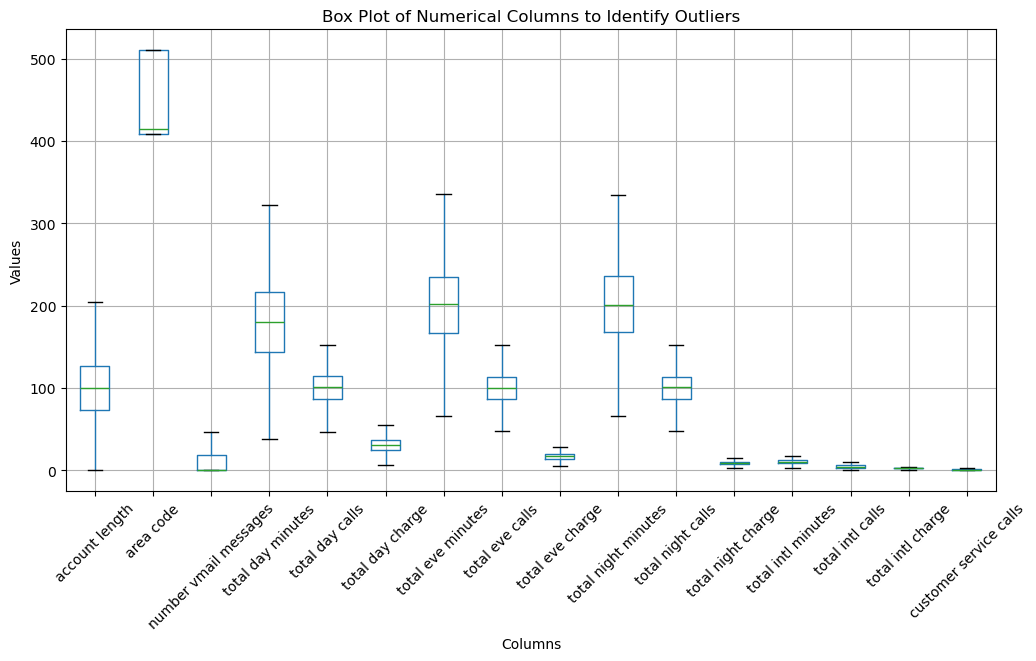

In [17]:
numerical_cols = df_cleaned.select_dtypes(include=['number'])

# Plot box plots for each numerical column
plt.figure(figsize=(12, 6))
numerical_cols.boxplot(rot=45)
plt.title("Box Plot of Numerical Columns to Identify Outliers")
plt.ylabel("Values")
plt.xlabel("Columns")
plt.show()

Our data is now cleaned, I can proceed now to do EDA

In [21]:
df_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2789 entries, 0 to 3332
Data columns (total 21 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   state                   2789 non-null   object 
 1   account length          2789 non-null   int64  
 2   area code               2789 non-null   int64  
 3   phone number            2789 non-null   object 
 4   international plan      2789 non-null   object 
 5   voice mail plan         2789 non-null   object 
 6   number vmail messages   2789 non-null   int64  
 7   total day minutes       2789 non-null   float64
 8   total day calls         2789 non-null   int64  
 9   total day charge        2789 non-null   float64
 10  total eve minutes       2789 non-null   float64
 11  total eve calls         2789 non-null   int64  
 12  total eve charge        2789 non-null   float64
 13  total night minutes     2789 non-null   float64
 14  total night calls       2789 non-null   int64

### Univirate Analysis

In [23]:
# Summary statistics of numerical columns
print(df_cleaned.describe())

       account length    area code  number vmail messages  total day minutes  \
count     2789.000000  2789.000000            2789.000000        2789.000000   
mean       100.402653   437.409824               8.052349         180.052599   
std         39.339037    42.525022              13.601924          52.599587   
min          1.000000   408.000000               0.000000          37.700000   
25%         73.000000   408.000000               0.000000         144.000000   
50%        100.000000   415.000000               0.000000         179.800000   
75%        127.000000   510.000000              19.000000         216.200000   
max        205.000000   510.000000              47.000000         322.500000   

       total day calls  total day charge  total eve minutes  total eve calls  \
count      2789.000000       2789.000000        2789.000000      2789.000000   
mean        100.565077         30.609480         201.399677        99.974543   
std          19.293990          8.94186

In [26]:
# Distribution of categorical variables
categorical_cols = df_cleaned.select_dtypes(include=['object']).columns

for col in categorical_cols:
    print(f"\nValue counts for {col}:")
    print(df_cleaned[col].value_counts())


Value counts for state:
state
WV    90
MN    76
WI    68
AL    67
OH    66
NY    65
CT    64
VA    63
OR    63
UT    62
NJ    61
NC    60
KS    60
TX    60
WA    59
MT    59
MS    59
VT    58
ID    58
MI    58
MA    58
NV    57
WY    57
IN    57
MD    56
RI    56
ND    55
AZ    53
FL    53
SD    52
NE    52
KY    51
DE    51
CO    51
MO    51
IL    51
ME    51
NM    50
TN    49
OK    48
DC    48
AK    46
SC    45
GA    44
HI    44
NH    44
LA    42
AR    42
PA    38
IA    36
CA    25
Name: count, dtype: int64

Value counts for phone number:
phone number
382-4657    1
411-1045    1
347-6994    1
413-7468    1
389-6082    1
           ..
402-3476    1
338-6018    1
409-3520    1
357-1085    1
400-4344    1
Name: count, Length: 2789, dtype: int64

Value counts for international plan:
international plan
no     2522
yes     267
Name: count, dtype: int64

Value counts for voice mail plan:
voice mail plan
no     2018
yes     771
Name: count, dtype: int64


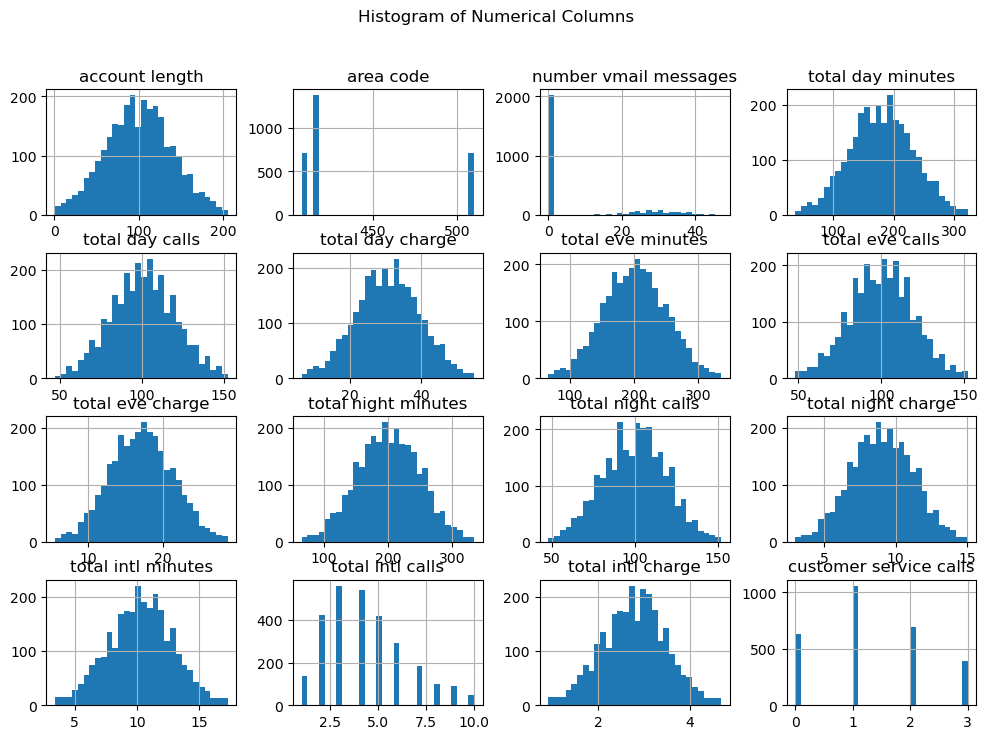

In [28]:
df_cleaned.hist(figsize=(12, 8), bins=30)
plt.suptitle("Histogram of Numerical Columns")
plt.show()

From the above Histograms
The following columns seem to be having a unifirm distribution:

1 accountlength,

2 total day minutes,

3 total day calls, 

4 total day charge, 

5 total eve minutes,

6 total eve calls ,

7 total eve charge, 

8 total night minutes, 

9 total night calls,

10 total night charge

11 total intl minutes

12 total intl charge




### Bivirate Analysis

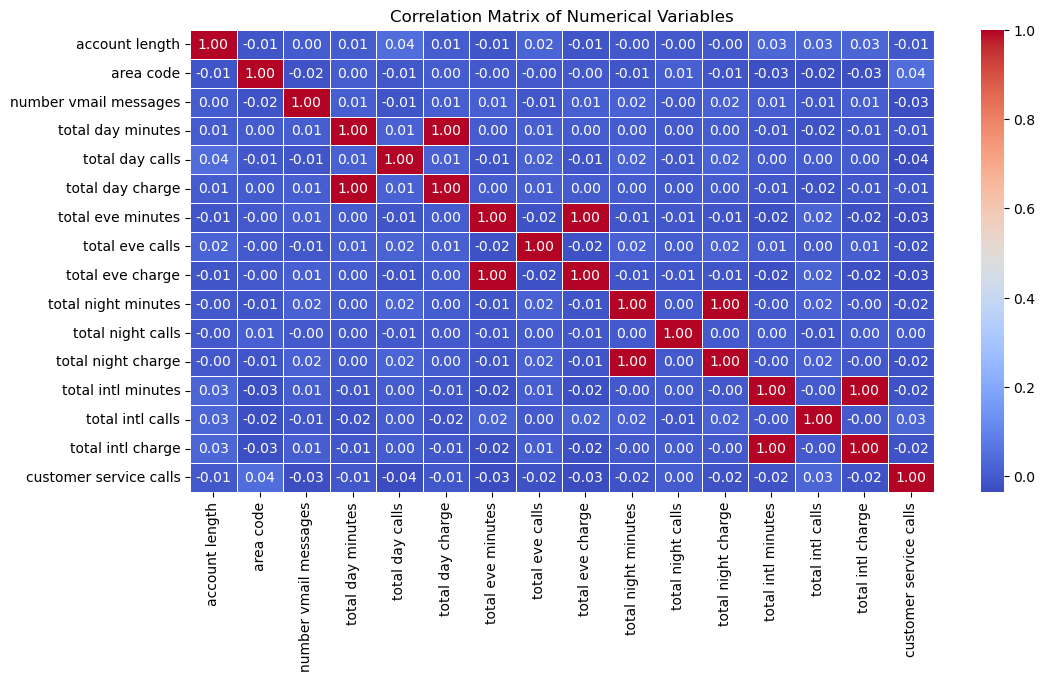

In [33]:
numeric_df = df_cleaned.select_dtypes(include=['number'])

# Compute and plot correlation matrix
plt.figure(figsize=(12, 6))
sns.heatmap(numeric_df.corr(), annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Correlation Matrix of Numerical Variables")
plt.show()

##### Strong Correlations (≈ 1.0)

Total day minutes and total day charge have a perfect correlation (1.00), indicating a direct linear relationship (likely because total day charge is derived from total day minutes).
Similarly, total eve minutes and total eve charge, total night minutes and total night charge, total intl minutes and total intl charge also show a perfect correlation (1.00).

##### Weak or No Significant Correlation (≈ 0.00)
Most other variables have near-zero correlations, meaning they don't have a strong linear relationship with each other.
For example, account length, area code, and customer service calls have very weak correlations with other numerical features, suggesting these are independent variables.

##### Slight Negative Correlations (≈ -0.01 to -0.04)
customer service calls has a slightly negative correlation with total day calls, total intl calls, and total day charge, but the values are too low to be significant.

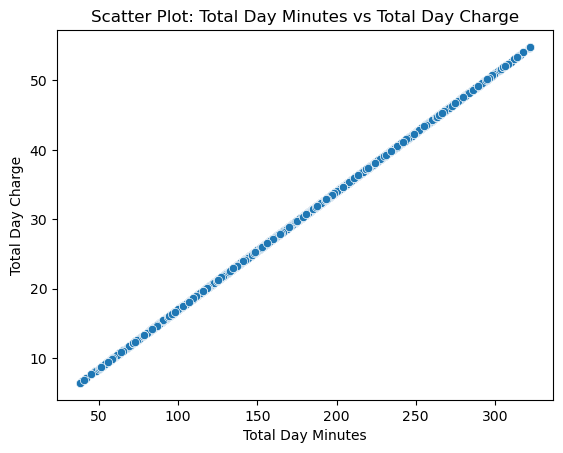

In [35]:
sns.scatterplot(x=df_cleaned["total day minutes"], y=df_cleaned["total day charge"])
plt.title("Scatter Plot: Total Day Minutes vs Total Day Charge")
plt.xlabel("Total Day Minutes")
plt.ylabel("Total Day Charge")
plt.show()